In [90]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Cleaning

In [92]:
data = pd.read_csv('DLbyDefermentType.csv')
#direct loan by deferment type
data.head()

,Year,Quarter,Dollars Outstanding (in billions),Recipients (in millions),Type,Unnamed: 5,Unnamed: 6
0,2015,Q1,$65.9,2.69,In-School Deferment,NaN,NaN
1,2015,Q2,$78.2,2.90,In-School Deferment,NaN,NaN
2,2015,Q3,$68.4,2.58,In-School Deferment,NaN,NaN
3,2015,Q4,$73.2,2.76,In-School Deferment,NaN,NaN
4,2016,Q1,$70.7,2.64,In-School Deferment,NaN,NaN


In [93]:
data.columns

Index(['Year', 'Quarter', 'Dollars Outstanding           (in billions)',
       'Recipients     (in millions)', 'Type', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [94]:
#data = data.drop(columns=['Unnamed: 5', 'Unnamed: 6'])

In [95]:
data.rename(columns={'Dollars Outstanding           (in billions)': 'dollars', 'Recipients     (in millions)': 'recipients'}, inplace=True)

In [96]:
data['Type'].value_counts()

Type
In-School Deferment          40
Six-Month Post-Enrollment    40
Unemployment                 40
Economic Hardship            40
Military                     40
Cancer Treatment             40
Other                        40
Not Reported                 40
Name: count, dtype: int64

In [97]:
data.head()

,Year,Quarter,dollars,recipients,Type,Unnamed: 5,Unnamed: 6
0,2015,Q1,$65.9,2.69,In-School Deferment,NaN,NaN
1,2015,Q2,$78.2,2.90,In-School Deferment,NaN,NaN
2,2015,Q3,$68.4,2.58,In-School Deferment,NaN,NaN
3,2015,Q4,$73.2,2.76,In-School Deferment,NaN,NaN
4,2016,Q1,$70.7,2.64,In-School Deferment,NaN,NaN


In [98]:
data['dollars'] = data['dollars'].apply(lambda x: re.sub(r'[$,]', '', str(x)))

In [99]:
data['dollars'] = data['dollars'].astype(float)

In [100]:
data.head()

,Year,Quarter,dollars,recipients,Type,Unnamed: 5,Unnamed: 6
0,2015,Q1,65.9,2.69,In-School Deferment,NaN,NaN
1,2015,Q2,78.2,2.90,In-School Deferment,NaN,NaN
2,2015,Q3,68.4,2.58,In-School Deferment,NaN,NaN
3,2015,Q4,73.2,2.76,In-School Deferment,NaN,NaN
4,2016,Q1,70.7,2.64,In-School Deferment,NaN,NaN


In [101]:
data.describe()

,Year,dollars,recipients,Unnamed: 5,Unnamed: 6
count,320.00000,300.000000,300.000000,0.0,0.0
mean,2019.50000,14.134000,0.428433,NaN,NaN
std,2.87678,32.140874,0.975300,NaN,NaN
min,2015.00000,0.000000,0.000000,NaN,NaN
25%,2017.00000,0.000000,0.000000,NaN,NaN
50%,2019.50000,0.500000,0.010000,NaN,NaN
75%,2022.00000,3.800000,0.120000,NaN,NaN
max,2024.00000,117.800000,3.270000,NaN,NaN


In [102]:
data2 = data.groupby('Type')['recipients'].mean()
data2

Type
Cancer Treatment             0.00150
Economic Hardship            0.07025
In-School Deferment          2.90000
Military                     0.00550
Not Reported                 0.00150
Other                        0.00100
Six-Month Post-Enrollment    0.12000
Unemployment                 0.11425
Name: recipients, dtype: float64

In [103]:
data3 = data.groupby('Year')['recipients'].mean()
data3

Year
2015    0.477857
2016    0.479643
2017    0.482500
2018    0.490714
2019    0.488929
2020    0.404062
2021    0.382812
2022    0.364375
2023    0.357500
2024    0.390625
Name: recipients, dtype: float64

In [104]:
print(data.isna().sum())

Year            0
Quarter         0
dollars        20
recipients     20
Type            0
Unnamed: 5    320
Unnamed: 6    320
dtype: int64


In [105]:
data_filled = data.fillna(0)

Questions to answer: what is the trend in the amount of dollars loaned and the number of recipients over time? Can we see a correlation between the number of receipients or amount of dollars loaned and the type of the deferment? Is there a correlation between loan amount and quarter?

EDA: There was a net increase in the amount owed from 2015 10 2024. The in-school deferment type average recipients was much higher than the other loan types. The average number of recipients had a net decrease by year.

In [108]:
loanType=pd.get_dummies(data_filled['Type'],dtype='int')
loanType.head()

,Cancer Treatment,Economic Hardship,In-School Deferment,Military,Not Reported,Other,Six-Month Post-Enrollment,Unemployment
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [109]:
df_final = data_filled.iloc[:, :4]
df_final.head()

,Year,Quarter,dollars,recipients
0,2015,Q1,65.9,2.69
1,2015,Q2,78.2,2.90
2,2015,Q3,68.4,2.58
3,2015,Q4,73.2,2.76
4,2016,Q1,70.7,2.64


In [110]:
df_final = pd.concat([df_final, loanType], axis=1)
df_final.head()

,Year,Quarter,dollars,recipients,Cancer Treatment,Economic Hardship,In-School Deferment,Military,Not Reported,Other,Six-Month Post-Enrollment,Unemployment
0,2015,Q1,65.9,2.69,0,0,1,0,0,0,0,0
1,2015,Q2,78.2,2.90,0,0,1,0,0,0,0,0
2,2015,Q3,68.4,2.58,0,0,1,0,0,0,0,0
3,2015,Q4,73.2,2.76,0,0,1,0,0,0,0,0
4,2016,Q1,70.7,2.64,0,0,1,0,0,0,0,0


In [111]:
df_final.columns

Index(['Year', 'Quarter', 'dollars', 'recipients', 'Cancer Treatment',
       'Economic Hardship', 'In-School Deferment', 'Military', 'Not Reported',
       'Other', 'Six-Month Post-Enrollment', 'Unemployment'],
      dtype='object')

# Linear Regression

In [188]:
x_features=['Economic Hardship', 'In-School Deferment', 'Military', 'Not Reported', 'Other', 'Six-Month Post-Enrollment', 'Unemployment']
y_feature=['dollars']

In [114]:
#RMSE is very important here because it is measuring billions of dollars

C:\Users\student\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


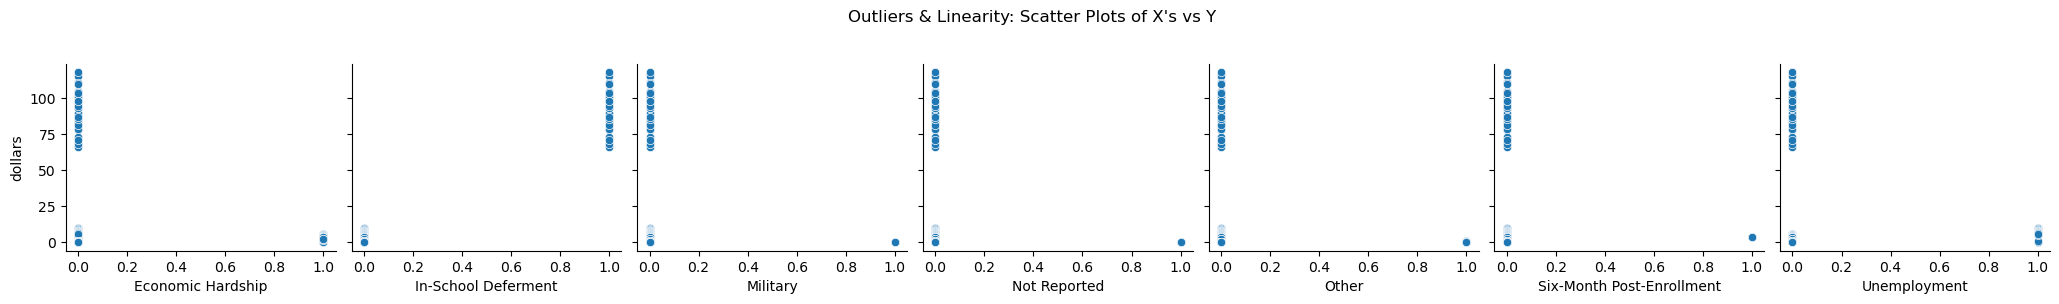

In [190]:
# Linearity
sns.pairplot(df_final, x_vars=x_features, y_vars=y_feature,size=3)
plt.suptitle(f"Outliers & Linearity: Scatter Plots of X's vs Y")
plt.subplots_adjust(top=0.80)
plt.show()

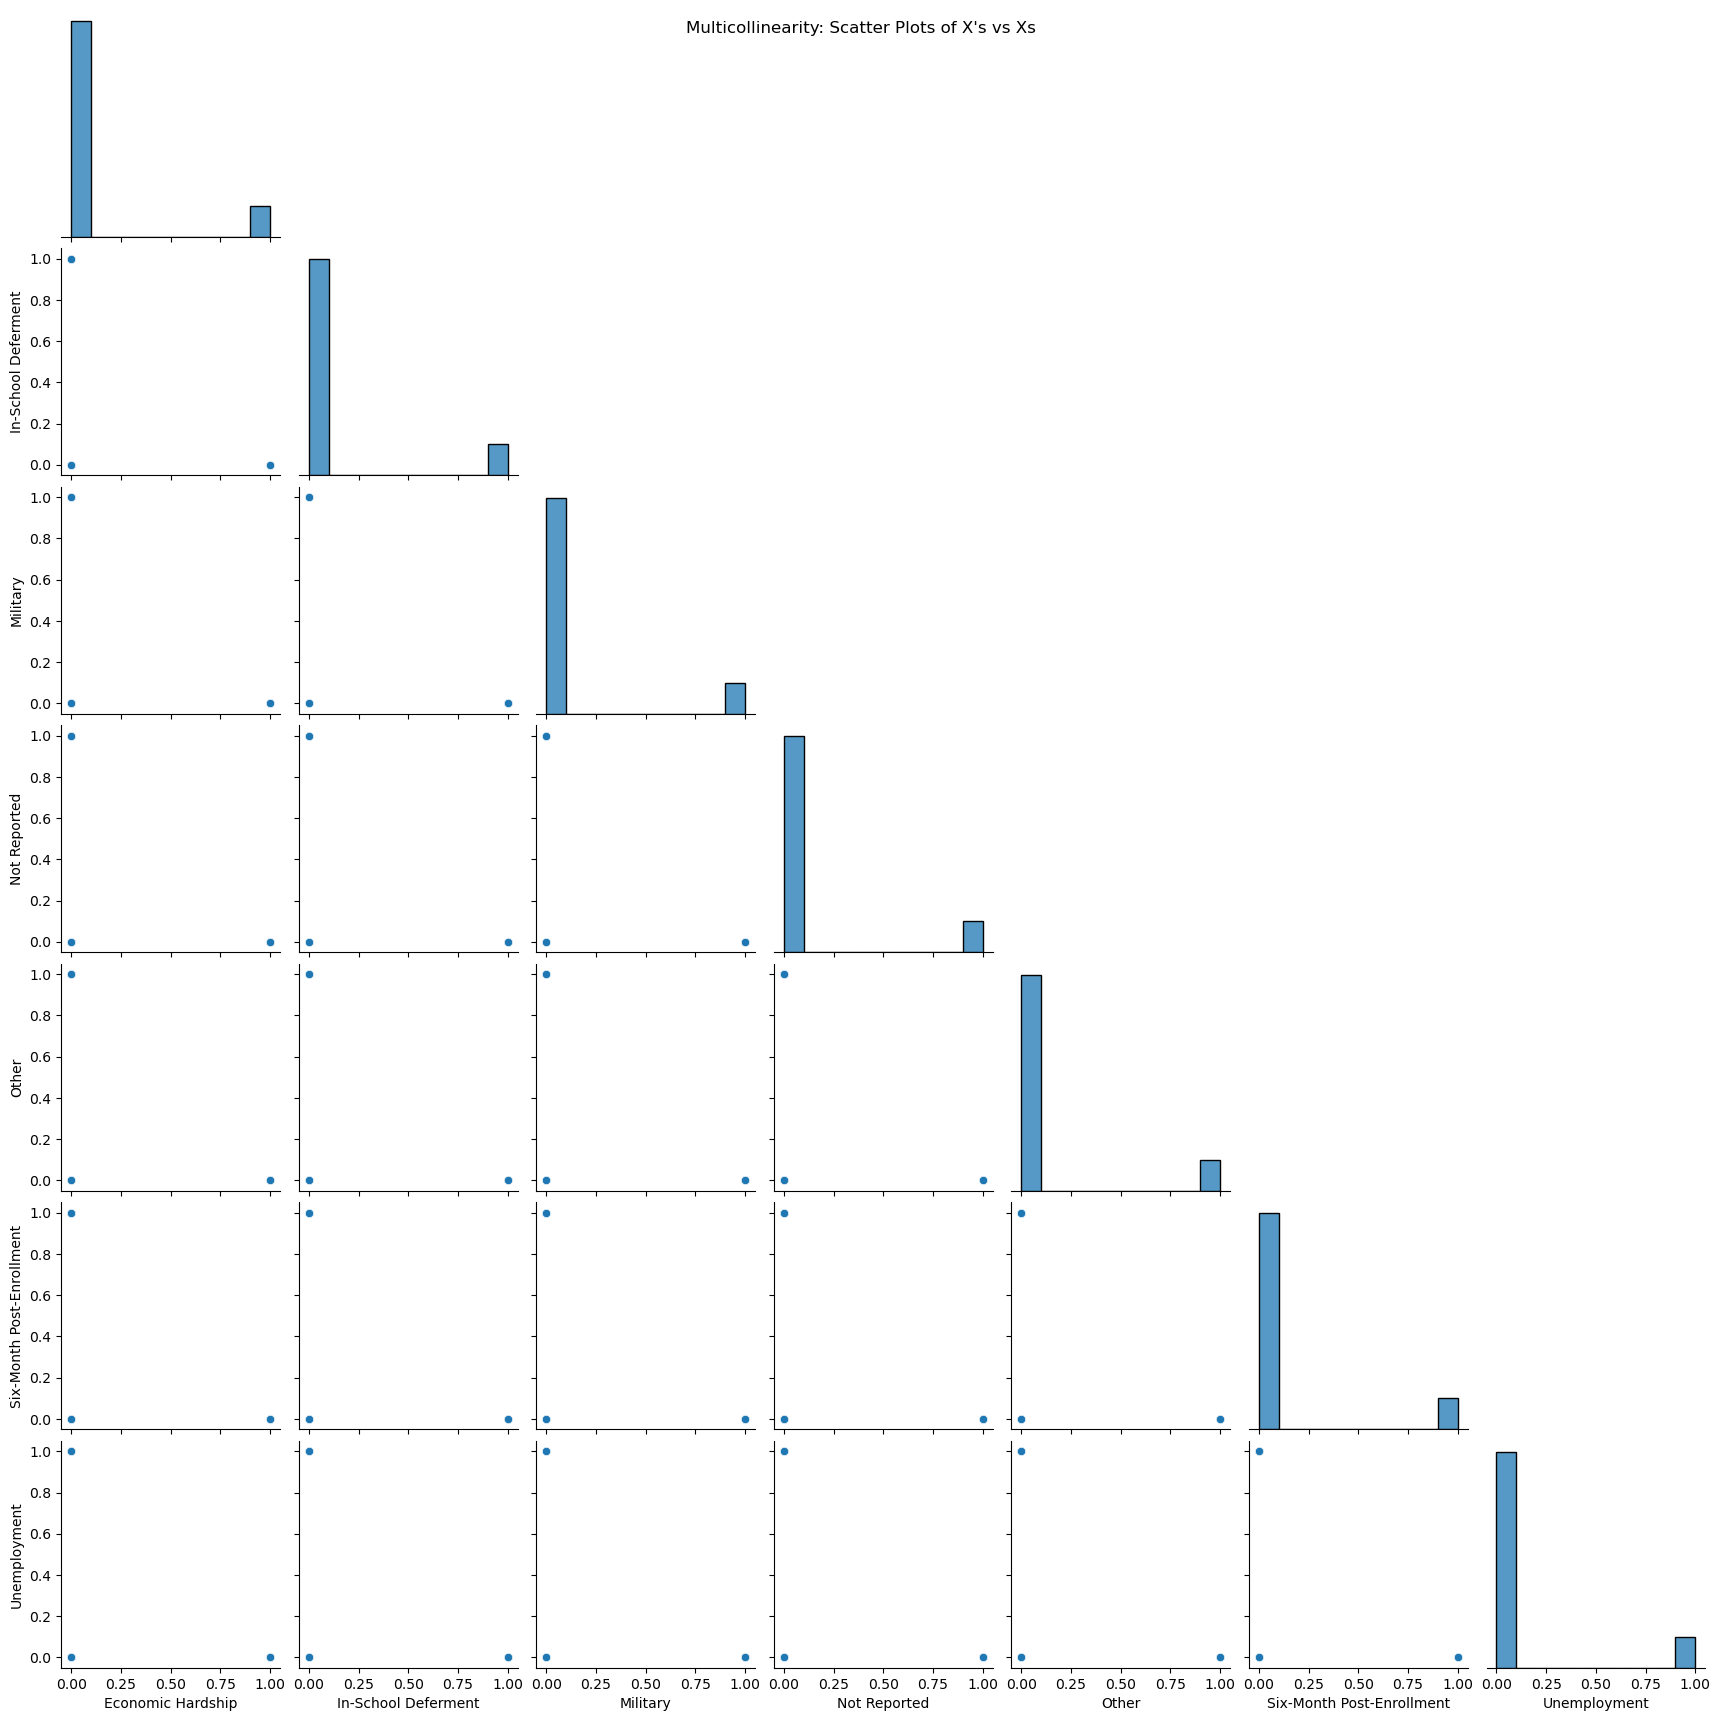

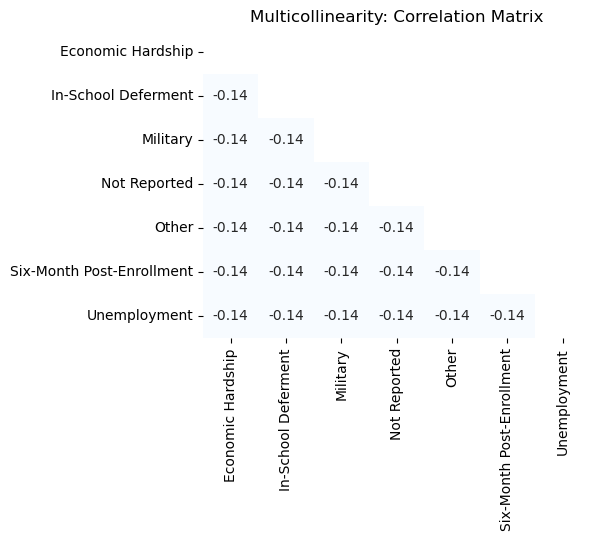

In [193]:
#multicollinearity
sns.pairplot(df_final[x_features],corner=True)
plt.suptitle(f"Multicollinearity: Scatter Plots of X's vs Xs")
plt.show()

correlation_matrix = pd.DataFrame(df_final[x_features]).corr()  # Correlation matrix of the features
plt.figure(figsize=(5, 4))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues',cbar=False,mask=mask,vmin=0,vmax=1)
plt.title(f"Multicollinearity: Correlation Matrix")
plt.show()

In [194]:
X = df_final[x_features]
Y = df_final[y_feature]

In [195]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [196]:
model = LinearRegression() #initializing the model
model.fit(X_train, Y_train) #building the model

b0 = model.intercept_
b1 = model.coef_[0]

print('Features in model: ', X.columns.values)
print(f"\nIntercept (b0): {np.round(b0, 2)}")
print("\nSlopes (betas):")
for name, beta in zip(X.columns, b1):
    print(f"  {name}: {np.round(beta, 2)}")

Features in model:  ['Economic Hardship' 'In-School Deferment' 'Military' 'Not Reported'
 'Other' 'Six-Month Post-Enrollment' 'Unemployment']

Intercept (b0): [0.08]

Slopes (betas):
  Economic Hardship: 2.35
  In-School Deferment: 94.34
  Military: 0.09
  Not Reported: -0.05
  Other: 0.24
  Six-Month Post-Enrollment: 3.72
  Unemployment: 4.09


In [197]:
Y_pred_train = model.predict(X_train)

#metrics to test model
r2 = r2_score(Y_train, Y_pred_train)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))

print(f"Training R-squared: {r2}")
print(f"Training RMSE: {rmse}")

Training R-squared: 0.9777539867077248
Training RMSE: 4.6405988379534575


In [198]:
Y_pred_test = model.predict(X_test)

#metrics to test model
r2 = r2_score(Y_test, Y_pred_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))

print(f"Testing R-squared: {r2}")
print(f"Testing RMSE: {rmse}")

Testing R-squared: 0.9778906133489823
Testing RMSE: 4.6964362580409045


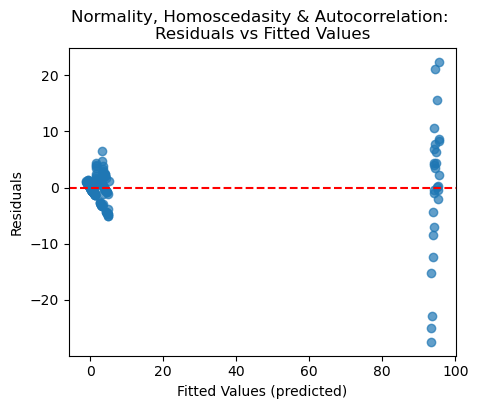

In [123]:
# residuals for the training data
residuals = Y_train.values - Y_pred_train
residuals=residuals.flatten()  

# Residual plot
plt.figure(figsize=(5, 4))
plt.scatter(Y_pred_train, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values (predicted)')
plt.ylabel('Residuals')
plt.title(f"Normality, Homoscedasity & Autocorrelation: \nResiduals vs Fitted Values")
plt.show()

In [124]:
#the residuals are not evenly dispersed for any of the models

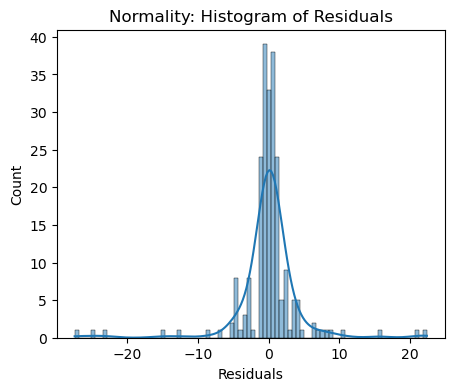

In [125]:
#Histogram of residuals (Normality check)
plt.figure(figsize=(5, 4))
sns.histplot(residuals, kde=True)
plt.title(f"Normality: Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()

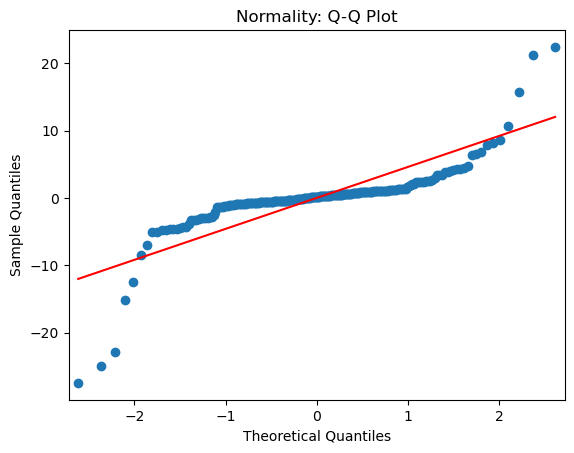

In [126]:
#Q-Q plot
sm.qqplot(residuals, line='s')
plt.title(f"Normality: Q-Q Plot")
plt.show()

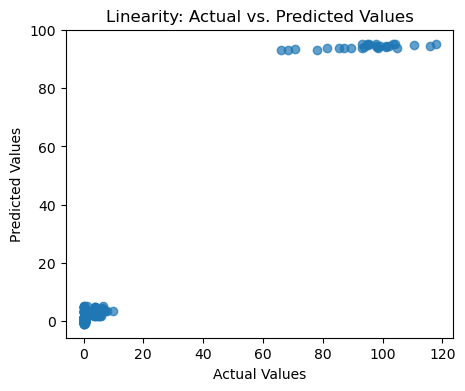

In [127]:
# Plot actual vs predicted values
plt.figure(figsize=(5, 4))
plt.scatter(Y_train, Y_pred_train, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f"Linearity: Actual vs. Predicted Values")
plt.show()

The linear regression model performs well, but most of the predictive power comes from the In-School Deferment variable, which is the most common in the dataset, so it does not seem like it would be that useful or have much generalizibility.

# Decision Tree

I believe this model would benefit from using a scaler so that feature importance is balanced, since the number of recipients are in millions, and having the year as part of the data barely captures any pattern. In-School Deferment is the majority of the data, so it makes sense that it would capture the most variability of dollars owed.

In [130]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import random
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [131]:
def plot_confusion_matrix(cm, class_labels=None, title=None, size=(2,2)):
    # Create a figure for the plot
    plt.figure(figsize=size)  # Adjust the figsize to make the plot smaller
    
    # Create a heatmap for the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues',
                cbar=False, fmt='g')
    # Add axis labels
    plt.xlabel('Predicted Labels', fontsize=8)
    plt.ylabel('True Labels', fontsize=8)

    # Add title for the plot
    plt.title(title, pad=20, fontsize=8)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [132]:
#convert loan type to categorical
data['Type'] = data['Type'].astype('category')
data['Type_encoded'] = data['Type'].cat.codes

# remove Q from quarter
if data['Quarter'].dtype == 'object':
    data['Quarter'] = data['Quarter'].str.extract('Q(\d)').astype(int)

# Features and target
X = data[['Year', 'Quarter', 'dollars', 'recipients']]
y = data['Type_encoded']
class_names = data['Type'].cat.categories  # to display in the tree

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\student\AppData\Local\Temp\ipykernel_27920\1927177597.py:7: SyntaxWarning: invalid escape sequence '\d'
  data['Quarter'] = data['Quarter'].str.extract('Q(\d)').astype(int)


In [133]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#search feature
param_grid = {
    'max_depth': list(range(2, 16)),
    'min_samples_split': list(range(10, 22)),
    'min_impurity_decrease': list(np.arange(0.0001, 0.005, 0.0001))  
}

# Initialize GridSearchCV with DecisionTreeClassifier
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)

# Perform grid search using training data
gridSearch.fit(X_train, y_train)

# Retrieve the best estimator found by grid search
bestTreeFound = gridSearch.best_estimator_

# Print the best tree found parameters
print(bestTreeFound)

DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.0001,
                       min_samples_split=10, random_state=1)


Accuracy: 0.78125


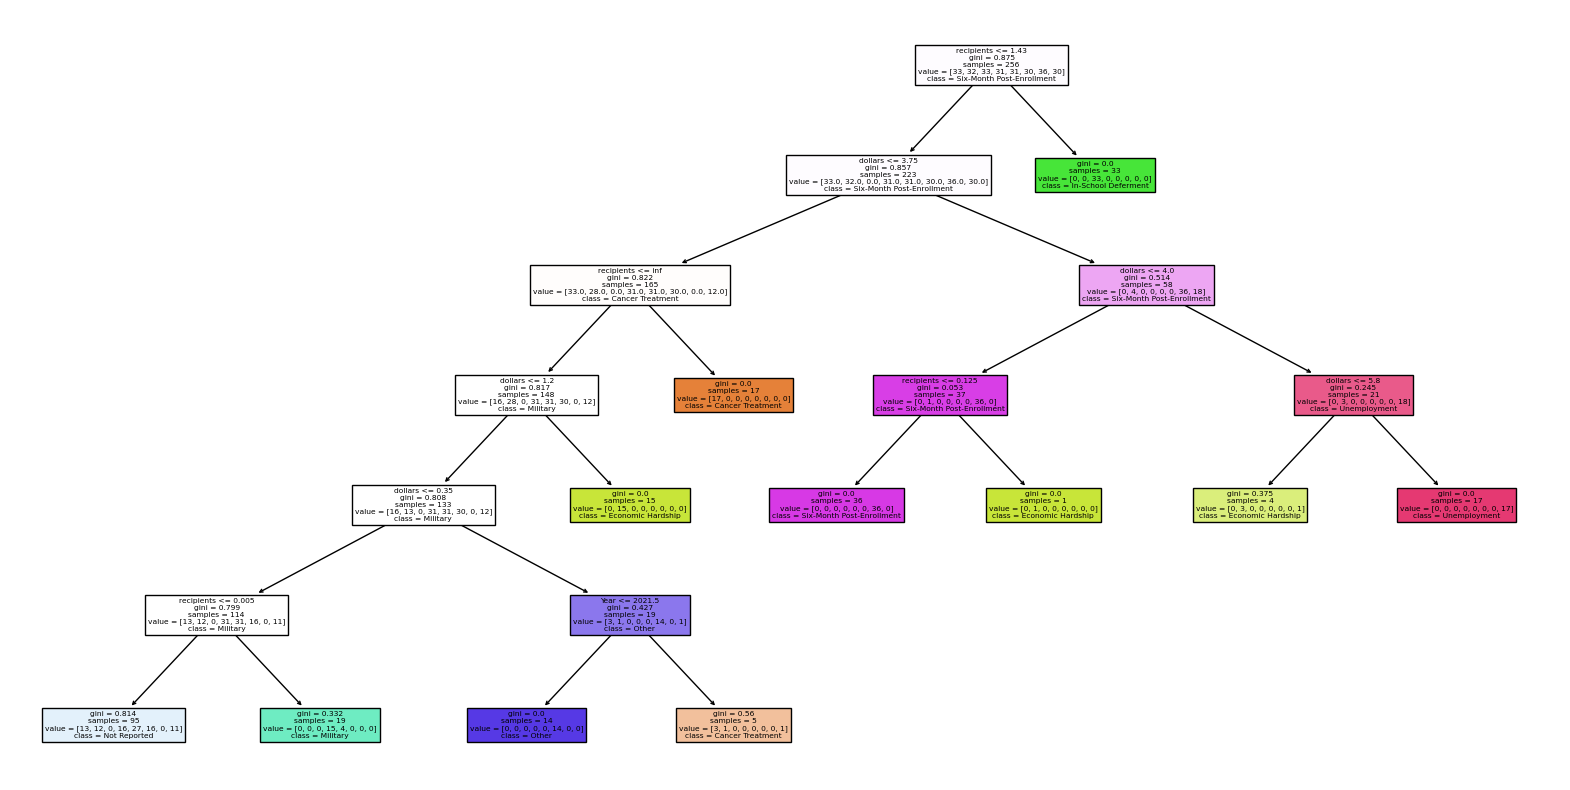

In [134]:
# Create and train the Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=6,min_impurity_decrease=0.0001,min_samples_split=10, random_state=1)
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, class_names=class_names, feature_names=X.columns)
plt.show()

Accuracy of Train:  0.70703125


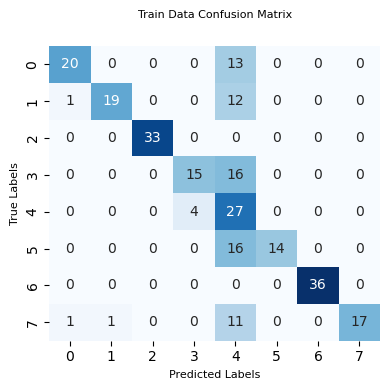

Accuracy of Test Data:  0.78125


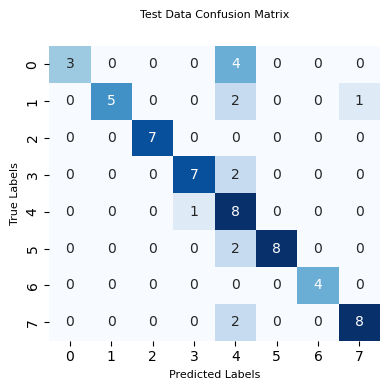

In [135]:

########## Training ############################

#Deploy the DT to predict new values
y_pred_train = tree.predict(X_train)

# Calculate accuracy on the training data
train_accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy of Train: ', train_accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(cm, class_labels=None, title='Train Data Confusion Matrix', size=(4,4))

########## Testing ############################

#Deploy the DT to predict new values
y_pred_test= tree.predict(X_test)

# Calculate accuracy of the test data
test_accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy of Test Data: ', test_accuracy)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm, class_labels=None, title='Test Data Confusion Matrix', size=(4,4))


The best parameter found for max_depth was 8, but I had better accuracy with 6 while trying to simplify the model. The model's accuracy is pretty good, but I think it could be improved.